In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install flair==0.12.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.1/373.1 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 788.5/788.5 kB 14.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 21.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 72.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 71.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 86.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.

In [3]:
!pip install transformers==4.30.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 81.9 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.15.0
    Uninstalling tokenizers-0.15.0:
      Successfully uninstalled tokenizers-0.15.0
  Attempting uninstall: transformers
    Found existing installation: transformers 4.35.2
    Uninstalling transformers-4.35.2:
      Successfully uninstalled transformers-4.35.2


In [4]:
from flair.data import Corpus
from flair.datasets import ColumnCorpus
from flair.embeddings import TokenEmbeddings, WordEmbeddings, StackedEmbeddings, FlairEmbeddings, FastTextEmbeddings
from typing import List

In [5]:
# Spanish corpus of 127 texts from ECHR (automatic translations) with projected annotations (reviewed and non-reviewed)

columns = {0:'text', 1:'ner'}

corpus_folder = '/content/drive/MyDrive/.../'
corpus : Corpus = ColumnCorpus(corpus_folder, columns,
                                    train_file='ES-all-train.tsv', column_delimiter=' ',
                                    dev_file='ES-all-dev.tsv',
                                    test_file='ES-all-test.tsv'
)

# obtain and print corpus statistics
stats = corpus.obtain_statistics()
print(stats)

2024-01-22 15:12:16,072 Reading data from /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler
2024-01-22 15:12:16,073 Train: /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/ES-all-train.tsv
2024-01-22 15:12:16,074 Dev: /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/ES-all-dev.tsv
2024-01-22 15:12:16,075 Test: /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/ES-all-test.tsv
{
    "TRAIN": {
        "dataset": "TRAIN",
        "total_number_of_documents": 3881,
        "number_of_documents_per_class": {
            "CODE": 191,
            "PER": 771,
            "DATETIME": 1931,
            "LOC": 368,
            "ORG": 480,
            "DEM": 162,
            "MISC": 154,
            "QUANTITY": 117
        },
        "number_of_tokens_per_tag": {},
        "number_of_tokens": {
            "total": 108232,
            "min": 1,
            "max": 556,
            "avg": 27.887657820149446
        }
    },
    "TEST": {
        "dataset

In [6]:
# initialize sequence tagger
from flair.models import SequenceTagger

tagger = SequenceTagger.load("flair/ner-multi")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

2024-01-22 15:12:33,463 SequenceTagger predicts: Dictionary with 20 tags: <unk>, O, B-PER, E-PER, S-LOC, B-MISC, I-MISC, E-MISC, S-PER, B-ORG, E-ORG, S-ORG, I-ORG, B-LOC, E-LOC, S-MISC, I-PER, I-LOC, <START>, <STOP>


In [7]:
# 2. what tag do we want to predict?
tag_type = 'ner'

# 3. make the tag dictionary from the corpus
new_tag_dictionary = corpus.make_label_dictionary(label_type=tag_type)
print(new_tag_dictionary.idx2item)

2024-01-22 15:12:34,175 Computing label dictionary. Progress:


3881it [00:00, 52073.40it/s]

2024-01-22 15:12:34,256 Dictionary created for label 'ner' with 9 values: DATETIME (seen 1931 times), PER (seen 771 times), ORG (seen 480 times), LOC (seen 368 times), CODE (seen 191 times), DEM (seen 162 times), MISC (seen 154 times), QUANTITY (seen 117 times)
[b'<unk>', b'DATETIME', b'PER', b'ORG', b'LOC', b'CODE', b'DEM', b'MISC', b'QUANTITY']


In [8]:
print(tagger.label_dictionary.idx2item)

[b'<unk>', b'O', b'B-PER', b'E-PER', b'S-LOC', b'B-MISC', b'I-MISC', b'E-MISC', b'S-PER', b'B-ORG', b'E-ORG', b'S-ORG', b'I-ORG', b'B-LOC', b'E-LOC', b'S-MISC', b'I-PER', b'I-LOC', b'<START>', b'<STOP>']


In [9]:
new_tagger = SequenceTagger(tagger.embeddings, new_tag_dictionary, tag_type=tag_type)

2024-01-22 15:12:34,273 SequenceTagger predicts: Dictionary with 33 tags: O, S-DATETIME, B-DATETIME, E-DATETIME, I-DATETIME, S-PER, B-PER, E-PER, I-PER, S-ORG, B-ORG, E-ORG, I-ORG, S-LOC, B-LOC, E-LOC, I-LOC, S-CODE, B-CODE, E-CODE, I-CODE, S-DEM, B-DEM, E-DEM, I-DEM, S-MISC, B-MISC, E-MISC, I-MISC, S-QUANTITY, B-QUANTITY, E-QUANTITY, I-QUANTITY


In [10]:
# initialize trainer
from flair.trainers import ModelTrainer
trainer = ModelTrainer(new_tagger, corpus)

In [11]:
# train # train_with_dev=True
trainer.train('/content/drive/MyDrive/...',
              learning_rate=0.1,
              mini_batch_size=32,
              max_epochs=25,
              write_weights=True)
# saving the model into your drive (need to provide the full path of the folder in which you want to save the model)

2024-01-22 15:12:34,841 ----------------------------------------------------------------------------------------------------
2024-01-22 15:12:34,843 Model: "SequenceTagger(
  (embeddings): StackedEmbeddings(
    (list_embedding_0): WordEmbeddings(
      '/home/alan/.flair/embeddings/glove.gensim'
      (embedding): Embedding(400001, 100)
    )
    (list_embedding_1): WordEmbeddings(
      '/home/alan/.flair/embeddings/de-wiki-fasttext-300d-1M'
      (embedding): Embedding(1000000, 300)
    )
    (list_embedding_2): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.5, inplace=False)
        (encoder): Embedding(300, 100)
        (rnn): LSTM(100, 2048)
        (decoder): Linear(in_features=2048, out_features=300, bias=True)
      )
    )
    (list_embedding_3): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.5, inplace=False)
        (encoder): Embedding(300, 100)
        (rnn): LSTM(100, 2048)
        (decoder): Linear(in_features=2048, out_

100%|██████████| 16/16 [00:07<00:00,  2.18it/s]

2024-01-22 15:13:37,635 Evaluating as a multi-label problem: False
2024-01-22 15:13:37,656 DEV : loss 0.25104305148124695 - f1-score (micro avg)  0.5386
2024-01-22 15:13:37,715 BAD EPOCHS (no improvement): 0
2024-01-22 15:13:37,721 saving best model


2024-01-22 15:13:43,184 ----------------------------------------------------------------------------------------------------
2024-01-22 15:13:45,813 epoch 2 - iter 12/122 - loss 0.31731045 - time (sec): 2.63 - samples/sec: 4137.79 - lr: 0.100000
2024-01-22 15:13:49,494 epoch 2 - iter 24/122 - loss 0.29703906 - time (sec): 6.31 - samples/sec: 3381.11 - lr: 0.100000
2024-01-22 15:13:53,093 epoch 2 - iter 36/122 - loss 0.27886543 - time (sec): 9.91 - samples/sec: 3224.98 - lr: 0.100000
2024-01-22 15:13:56,684 epoch 2 - iter 48/122 - loss 0.27170796 - time (sec): 13.50 - samples/sec: 3125.82 - lr: 0.100000
2024-01-22 15:14:00,499 epoch 2 - iter 60/122 - loss 0.25889141 - time (sec): 17.31 - samples/sec: 3076.92 - lr: 0.100000
2024-01-22 15:14:04,309 epoch 2 - iter 72/122 - loss 0.24936263 - time (sec): 21.12 - samples/sec: 3025.88 - lr: 0.100000
2024-01-22 15:14:07,886 epoch 2 - iter 84/122 - loss 0.24605102 - time (sec): 24.70 - samples/sec: 3007.43 - lr: 0.100000
2024-01-22 15:14:11,787 

100%|██████████| 16/16 [00:04<00:00,  3.41it/s]

2024-01-22 15:14:26,071 Evaluating as a multi-label problem: False
2024-01-22 15:14:26,089 DEV : loss 0.14073167741298676 - f1-score (micro avg)  0.7358
2024-01-22 15:14:26,152 BAD EPOCHS (no improvement): 0
2024-01-22 15:14:26,158 saving best model


2024-01-22 15:14:32,855 ----------------------------------------------------------------------------------------------------
2024-01-22 15:14:35,341 epoch 3 - iter 12/122 - loss 0.21490948 - time (sec): 2.48 - samples/sec: 4321.46 - lr: 0.100000
2024-01-22 15:14:39,142 epoch 3 - iter 24/122 - loss 0.19879537 - time (sec): 6.29 - samples/sec: 3429.72 - lr: 0.100000
2024-01-22 15:14:42,661 epoch 3 - iter 36/122 - loss 0.18462339 - time (sec): 9.80 - samples/sec: 3247.86 - lr: 0.100000
2024-01-22 15:14:46,638 epoch 3 - iter 48/122 - loss 0.18898386 - time (sec): 13.78 - samples/sec: 3106.08 - lr: 0.100000
2024-01-22 15:14:50,406 epoch 3 - iter 60/122 - loss 0.19034984 - time (sec): 17.55 - samples/sec: 3043.64 - lr: 0.100000
2024-01-22 15:14:54,900 epoch 3 - iter 72/122 - loss 0.18707441 - time (sec): 22.04 - samples/sec: 2929.04 - lr: 0.100000
2024-01-22 15:14:59,195 epoch 3 - iter 84/122 - loss 0.20318913 - time (sec): 26.34 - samples/sec: 2862.50 - lr: 0.100000
2024-01-22 15:15:02,749 

100%|██████████| 16/16 [00:04<00:00,  3.46it/s]

2024-01-22 15:15:16,109 Evaluating as a multi-label problem: False
2024-01-22 15:15:16,129 DEV : loss 0.10702275484800339 - f1-score (micro avg)  0.7686
2024-01-22 15:15:16,199 BAD EPOCHS (no improvement): 0
2024-01-22 15:15:16,205 saving best model


2024-01-22 15:15:22,268 ----------------------------------------------------------------------------------------------------
2024-01-22 15:15:24,800 epoch 4 - iter 12/122 - loss 0.17038775 - time (sec): 2.53 - samples/sec: 3989.03 - lr: 0.100000
2024-01-22 15:15:28,507 epoch 4 - iter 24/122 - loss 0.16094471 - time (sec): 6.24 - samples/sec: 3337.04 - lr: 0.100000
2024-01-22 15:15:32,798 epoch 4 - iter 36/122 - loss 0.20859016 - time (sec): 10.53 - samples/sec: 3035.58 - lr: 0.100000
2024-01-22 15:15:36,510 epoch 4 - iter 48/122 - loss 0.19366708 - time (sec): 14.24 - samples/sec: 3005.52 - lr: 0.100000
2024-01-22 15:15:40,441 epoch 4 - iter 60/122 - loss 0.18271683 - time (sec): 18.17 - samples/sec: 2949.20 - lr: 0.100000
2024-01-22 15:15:44,374 epoch 4 - iter 72/122 - loss 0.17786125 - time (sec): 22.10 - samples/sec: 2924.49 - lr: 0.100000
2024-01-22 15:15:48,145 epoch 4 - iter 84/122 - loss 0.17461454 - time (sec): 25.88 - samples/sec: 2900.41 - lr: 0.100000
2024-01-22 15:15:51,873

100%|██████████| 16/16 [00:04<00:00,  3.43it/s]

2024-01-22 15:16:05,538 Evaluating as a multi-label problem: False
2024-01-22 15:16:05,556 DEV : loss 0.10679430514574051 - f1-score (micro avg)  0.6761
2024-01-22 15:16:05,619 BAD EPOCHS (no improvement): 1
2024-01-22 15:16:05,624 ----------------------------------------------------------------------------------------------------


2024-01-22 15:16:08,077 epoch 5 - iter 12/122 - loss 0.14405695 - time (sec): 2.45 - samples/sec: 4317.59 - lr: 0.100000
2024-01-22 15:16:12,054 epoch 5 - iter 24/122 - loss 0.13733003 - time (sec): 6.43 - samples/sec: 3331.14 - lr: 0.100000
2024-01-22 15:16:15,475 epoch 5 - iter 36/122 - loss 0.13476436 - time (sec): 9.85 - samples/sec: 3207.71 - lr: 0.100000
2024-01-22 15:16:19,089 epoch 5 - iter 48/122 - loss 0.13454360 - time (sec): 13.46 - samples/sec: 3155.65 - lr: 0.100000
2024-01-22 15:16:22,734 epoch 5 - iter 60/122 - loss 0.13379346 - time (sec): 17.11 - samples/sec: 3107.32 - lr: 0.100000
2024-01-22 15:16:26,283 epoch 5 - iter 72/122 - loss 0.13843071 - time (sec): 20.66 - samples/sec: 3081.46 - lr: 0.100000
2024-01-22 15:16:29,895 epoch 5 - iter 84/122 - loss 0.13858469 - time (sec): 24.27 - samples/sec: 3040.73 - lr: 0.100000
2024-01-22 15:16:33,362 epoch 5 - iter 96/122 - loss 0.13732069 - time (sec): 27.74 - samples/sec: 3029.24 - lr: 0.100000
2024-01-22 15:16:37,852 epo

100%|██████████| 16/16 [00:04<00:00,  3.40it/s]

2024-01-22 15:16:47,557 Evaluating as a multi-label problem: False
2024-01-22 15:16:47,575 DEV : loss 0.08524397015571594 - f1-score (micro avg)  0.7803
2024-01-22 15:16:47,635 BAD EPOCHS (no improvement): 0
2024-01-22 15:16:47,641 saving best model


2024-01-22 15:16:53,569 ----------------------------------------------------------------------------------------------------
2024-01-22 15:16:56,056 epoch 6 - iter 12/122 - loss 0.12707911 - time (sec): 2.48 - samples/sec: 4027.44 - lr: 0.100000
2024-01-22 15:16:59,722 epoch 6 - iter 24/122 - loss 0.13501816 - time (sec): 6.15 - samples/sec: 3332.29 - lr: 0.100000
2024-01-22 15:17:03,268 epoch 6 - iter 36/122 - loss 0.13273152 - time (sec): 9.70 - samples/sec: 3173.68 - lr: 0.100000
2024-01-22 15:17:07,201 epoch 6 - iter 48/122 - loss 0.13151309 - time (sec): 13.63 - samples/sec: 3054.54 - lr: 0.100000
2024-01-22 15:17:10,829 epoch 6 - iter 60/122 - loss 0.12767250 - time (sec): 17.26 - samples/sec: 3010.43 - lr: 0.100000
2024-01-22 15:17:14,888 epoch 6 - iter 72/122 - loss 0.12712840 - time (sec): 21.32 - samples/sec: 2939.72 - lr: 0.100000
2024-01-22 15:17:19,195 epoch 6 - iter 84/122 - loss 0.12667088 - time (sec): 25.62 - samples/sec: 2888.33 - lr: 0.100000
2024-01-22 15:17:22,949 

100%|██████████| 16/16 [00:05<00:00,  3.03it/s]

2024-01-22 15:17:37,408 Evaluating as a multi-label problem: False
2024-01-22 15:17:37,427 DEV : loss 0.08134474605321884 - f1-score (micro avg)  0.7963
2024-01-22 15:17:37,488 BAD EPOCHS (no improvement): 0
2024-01-22 15:17:37,494 saving best model


2024-01-22 15:17:43,447 ----------------------------------------------------------------------------------------------------
2024-01-22 15:17:46,193 epoch 7 - iter 12/122 - loss 0.11463795 - time (sec): 2.74 - samples/sec: 4000.71 - lr: 0.100000
2024-01-22 15:17:49,675 epoch 7 - iter 24/122 - loss 0.12272097 - time (sec): 6.23 - samples/sec: 3441.63 - lr: 0.100000
2024-01-22 15:17:53,356 epoch 7 - iter 36/122 - loss 0.11191749 - time (sec): 9.91 - samples/sec: 3276.02 - lr: 0.100000
2024-01-22 15:17:57,010 epoch 7 - iter 48/122 - loss 0.10926808 - time (sec): 13.56 - samples/sec: 3166.27 - lr: 0.100000
2024-01-22 15:18:00,859 epoch 7 - iter 60/122 - loss 0.11335705 - time (sec): 17.41 - samples/sec: 3093.54 - lr: 0.100000
2024-01-22 15:18:04,748 epoch 7 - iter 72/122 - loss 0.11405657 - time (sec): 21.30 - samples/sec: 3046.63 - lr: 0.100000
2024-01-22 15:18:09,317 epoch 7 - iter 84/122 - loss 0.11517849 - time (sec): 25.87 - samples/sec: 2921.90 - lr: 0.100000
2024-01-22 15:18:13,828 

100%|██████████| 16/16 [00:04<00:00,  3.42it/s]

2024-01-22 15:18:27,000 Evaluating as a multi-label problem: False
2024-01-22 15:18:27,019 DEV : loss 0.07414859533309937 - f1-score (micro avg)  0.8236
2024-01-22 15:18:27,083 BAD EPOCHS (no improvement): 0
2024-01-22 15:18:27,088 saving best model


2024-01-22 15:18:33,121 ----------------------------------------------------------------------------------------------------
2024-01-22 15:18:35,791 epoch 8 - iter 12/122 - loss 0.11255122 - time (sec): 2.67 - samples/sec: 4217.08 - lr: 0.100000
2024-01-22 15:18:39,190 epoch 8 - iter 24/122 - loss 0.10761315 - time (sec): 6.07 - samples/sec: 3530.40 - lr: 0.100000
2024-01-22 15:18:43,635 epoch 8 - iter 36/122 - loss 0.12578499 - time (sec): 10.51 - samples/sec: 3048.70 - lr: 0.100000
2024-01-22 15:18:47,497 epoch 8 - iter 48/122 - loss 0.12186287 - time (sec): 14.37 - samples/sec: 2984.64 - lr: 0.100000
2024-01-22 15:18:50,981 epoch 8 - iter 60/122 - loss 0.11943946 - time (sec): 17.86 - samples/sec: 2989.08 - lr: 0.100000
2024-01-22 15:18:54,688 epoch 8 - iter 72/122 - loss 0.12381620 - time (sec): 21.57 - samples/sec: 2986.81 - lr: 0.100000
2024-01-22 15:18:58,254 epoch 8 - iter 84/122 - loss 0.11955490 - time (sec): 25.13 - samples/sec: 2976.50 - lr: 0.100000
2024-01-22 15:19:02,125

100%|██████████| 16/16 [00:05<00:00,  3.02it/s]

2024-01-22 15:19:16,215 Evaluating as a multi-label problem: False
2024-01-22 15:19:16,234 DEV : loss 0.08368247747421265 - f1-score (micro avg)  0.7914
2024-01-22 15:19:16,295 BAD EPOCHS (no improvement): 1
2024-01-22 15:19:16,301 ----------------------------------------------------------------------------------------------------


2024-01-22 15:19:18,937 epoch 9 - iter 12/122 - loss 0.10769138 - time (sec): 2.63 - samples/sec: 4226.90 - lr: 0.100000
2024-01-22 15:19:22,434 epoch 9 - iter 24/122 - loss 0.11582182 - time (sec): 6.13 - samples/sec: 3447.36 - lr: 0.100000
2024-01-22 15:19:26,585 epoch 9 - iter 36/122 - loss 0.13846570 - time (sec): 10.28 - samples/sec: 3121.50 - lr: 0.100000
2024-01-22 15:19:30,065 epoch 9 - iter 48/122 - loss 0.12453358 - time (sec): 13.76 - samples/sec: 3075.24 - lr: 0.100000
2024-01-22 15:19:33,620 epoch 9 - iter 60/122 - loss 0.12279668 - time (sec): 17.32 - samples/sec: 3056.77 - lr: 0.100000
2024-01-22 15:19:37,053 epoch 9 - iter 72/122 - loss 0.12138375 - time (sec): 20.75 - samples/sec: 3065.56 - lr: 0.100000
2024-01-22 15:19:40,424 epoch 9 - iter 84/122 - loss 0.11757377 - time (sec): 24.12 - samples/sec: 3081.97 - lr: 0.100000
2024-01-22 15:19:43,935 epoch 9 - iter 96/122 - loss 0.11321269 - time (sec): 27.63 - samples/sec: 3086.83 - lr: 0.100000
2024-01-22 15:19:47,469 ep

100%|██████████| 16/16 [00:04<00:00,  3.48it/s]

2024-01-22 15:19:56,911 Evaluating as a multi-label problem: False
2024-01-22 15:19:56,930 DEV : loss 0.06484159082174301 - f1-score (micro avg)  0.8233
2024-01-22 15:19:56,992 BAD EPOCHS (no improvement): 2
2024-01-22 15:19:56,998 ----------------------------------------------------------------------------------------------------


2024-01-22 15:19:59,490 epoch 10 - iter 12/122 - loss 0.08539693 - time (sec): 2.49 - samples/sec: 4343.03 - lr: 0.100000
2024-01-22 15:20:02,934 epoch 10 - iter 24/122 - loss 0.09160211 - time (sec): 5.93 - samples/sec: 3625.10 - lr: 0.100000
2024-01-22 15:20:06,315 epoch 10 - iter 36/122 - loss 0.09434112 - time (sec): 9.31 - samples/sec: 3409.72 - lr: 0.100000
2024-01-22 15:20:09,830 epoch 10 - iter 48/122 - loss 0.09232960 - time (sec): 12.83 - samples/sec: 3317.10 - lr: 0.100000
2024-01-22 15:20:13,181 epoch 10 - iter 60/122 - loss 0.09121209 - time (sec): 16.18 - samples/sec: 3249.79 - lr: 0.100000
2024-01-22 15:20:16,847 epoch 10 - iter 72/122 - loss 0.09654100 - time (sec): 19.85 - samples/sec: 3184.02 - lr: 0.100000
2024-01-22 15:20:20,229 epoch 10 - iter 84/122 - loss 0.09616195 - time (sec): 23.23 - samples/sec: 3158.63 - lr: 0.100000
2024-01-22 15:20:23,698 epoch 10 - iter 96/122 - loss 0.09592544 - time (sec): 26.70 - samples/sec: 3171.88 - lr: 0.100000
2024-01-22 15:20:28

100%|██████████| 16/16 [00:05<00:00,  3.09it/s]

2024-01-22 15:20:38,096 Evaluating as a multi-label problem: False
2024-01-22 15:20:38,115 DEV : loss 0.07031064480543137 - f1-score (micro avg)  0.7561
2024-01-22 15:20:38,177 BAD EPOCHS (no improvement): 3
2024-01-22 15:20:38,183 ----------------------------------------------------------------------------------------------------


2024-01-22 15:20:40,501 epoch 11 - iter 12/122 - loss 0.07995928 - time (sec): 2.32 - samples/sec: 4353.00 - lr: 0.100000
2024-01-22 15:20:44,253 epoch 11 - iter 24/122 - loss 0.08064113 - time (sec): 6.07 - samples/sec: 3517.29 - lr: 0.100000
2024-01-22 15:20:48,404 epoch 11 - iter 36/122 - loss 0.10340649 - time (sec): 10.22 - samples/sec: 3203.90 - lr: 0.100000
2024-01-22 15:20:51,878 epoch 11 - iter 48/122 - loss 0.10310773 - time (sec): 13.69 - samples/sec: 3171.96 - lr: 0.100000
2024-01-22 15:20:55,390 epoch 11 - iter 60/122 - loss 0.10317666 - time (sec): 17.20 - samples/sec: 3146.36 - lr: 0.100000
2024-01-22 15:20:58,747 epoch 11 - iter 72/122 - loss 0.10069599 - time (sec): 20.56 - samples/sec: 3142.30 - lr: 0.100000
2024-01-22 15:21:02,042 epoch 11 - iter 84/122 - loss 0.09854839 - time (sec): 23.86 - samples/sec: 3155.36 - lr: 0.100000
2024-01-22 15:21:05,459 epoch 11 - iter 96/122 - loss 0.09900842 - time (sec): 27.27 - samples/sec: 3145.39 - lr: 0.100000
2024-01-22 15:21:0

100%|██████████| 16/16 [00:04<00:00,  3.50it/s]

2024-01-22 15:21:18,267 Evaluating as a multi-label problem: False
2024-01-22 15:21:18,287 DEV : loss 0.07037831097841263 - f1-score (micro avg)  0.8212
2024-01-22 15:21:18,351 Epoch    11: reducing learning rate of group 0 to 5.0000e-02.
2024-01-22 15:21:18,353 BAD EPOCHS (no improvement): 4
2024-01-22 15:21:18,358 ----------------------------------------------------------------------------------------------------


2024-01-22 15:21:20,953 epoch 12 - iter 12/122 - loss 0.07046723 - time (sec): 2.59 - samples/sec: 4214.09 - lr: 0.050000
2024-01-22 15:21:24,367 epoch 12 - iter 24/122 - loss 0.07502606 - time (sec): 6.01 - samples/sec: 3666.79 - lr: 0.050000
2024-01-22 15:21:27,788 epoch 12 - iter 36/122 - loss 0.07430253 - time (sec): 9.43 - samples/sec: 3462.45 - lr: 0.050000
2024-01-22 15:21:31,438 epoch 12 - iter 48/122 - loss 0.07595524 - time (sec): 13.08 - samples/sec: 3328.72 - lr: 0.050000
2024-01-22 15:21:35,600 epoch 12 - iter 60/122 - loss 0.07867224 - time (sec): 17.24 - samples/sec: 3171.01 - lr: 0.050000
2024-01-22 15:21:38,904 epoch 12 - iter 72/122 - loss 0.07941152 - time (sec): 20.54 - samples/sec: 3164.34 - lr: 0.050000
2024-01-22 15:21:42,328 epoch 12 - iter 84/122 - loss 0.07868104 - time (sec): 23.97 - samples/sec: 3165.22 - lr: 0.050000
2024-01-22 15:21:45,852 epoch 12 - iter 96/122 - loss 0.07821252 - time (sec): 27.49 - samples/sec: 3147.61 - lr: 0.050000
2024-01-22 15:21:49

100%|██████████| 16/16 [00:05<00:00,  3.03it/s]

2024-01-22 15:21:59,414 Evaluating as a multi-label problem: False
2024-01-22 15:21:59,433 DEV : loss 0.05803120508790016 - f1-score (micro avg)  0.8193
2024-01-22 15:21:59,494 BAD EPOCHS (no improvement): 1
2024-01-22 15:21:59,499 ----------------------------------------------------------------------------------------------------


2024-01-22 15:22:01,855 epoch 13 - iter 12/122 - loss 0.07401204 - time (sec): 2.35 - samples/sec: 4533.96 - lr: 0.050000
2024-01-22 15:22:05,291 epoch 13 - iter 24/122 - loss 0.07197764 - time (sec): 5.79 - samples/sec: 3627.39 - lr: 0.050000
2024-01-22 15:22:08,990 epoch 13 - iter 36/122 - loss 0.07105134 - time (sec): 9.49 - samples/sec: 3369.68 - lr: 0.050000
2024-01-22 15:22:12,496 epoch 13 - iter 48/122 - loss 0.07163375 - time (sec): 12.99 - samples/sec: 3265.22 - lr: 0.050000
2024-01-22 15:22:16,579 epoch 13 - iter 60/122 - loss 0.07878164 - time (sec): 17.08 - samples/sec: 3103.49 - lr: 0.050000
2024-01-22 15:22:20,415 epoch 13 - iter 72/122 - loss 0.07934532 - time (sec): 20.91 - samples/sec: 3089.92 - lr: 0.050000
2024-01-22 15:22:23,899 epoch 13 - iter 84/122 - loss 0.07937572 - time (sec): 24.40 - samples/sec: 3086.23 - lr: 0.050000
2024-01-22 15:22:27,516 epoch 13 - iter 96/122 - loss 0.07869578 - time (sec): 28.01 - samples/sec: 3071.35 - lr: 0.050000
2024-01-22 15:22:31

100%|██████████| 16/16 [00:04<00:00,  3.36it/s]

2024-01-22 15:22:40,651 Evaluating as a multi-label problem: False
2024-01-22 15:22:40,669 DEV : loss 0.05711939185857773 - f1-score (micro avg)  0.8312
2024-01-22 15:22:40,729 BAD EPOCHS (no improvement): 0
2024-01-22 15:22:40,735 saving best model


2024-01-22 15:22:46,421 ----------------------------------------------------------------------------------------------------
2024-01-22 15:22:48,929 epoch 14 - iter 12/122 - loss 0.06990080 - time (sec): 2.51 - samples/sec: 4316.40 - lr: 0.050000
2024-01-22 15:22:53,287 epoch 14 - iter 24/122 - loss 0.06629090 - time (sec): 6.86 - samples/sec: 3199.98 - lr: 0.050000
2024-01-22 15:22:57,603 epoch 14 - iter 36/122 - loss 0.07822351 - time (sec): 11.18 - samples/sec: 2964.86 - lr: 0.050000
2024-01-22 15:23:01,180 epoch 14 - iter 48/122 - loss 0.07880554 - time (sec): 14.76 - samples/sec: 2958.11 - lr: 0.050000
2024-01-22 15:23:04,922 epoch 14 - iter 60/122 - loss 0.07935576 - time (sec): 18.50 - samples/sec: 2907.12 - lr: 0.050000
2024-01-22 15:23:08,770 epoch 14 - iter 72/122 - loss 0.07838774 - time (sec): 22.35 - samples/sec: 2873.33 - lr: 0.050000
2024-01-22 15:23:12,445 epoch 14 - iter 84/122 - loss 0.07772592 - time (sec): 26.02 - samples/sec: 2881.38 - lr: 0.050000
2024-01-22 15:23

100%|██████████| 16/16 [00:05<00:00,  3.01it/s]

2024-01-22 15:23:30,310 Evaluating as a multi-label problem: False
2024-01-22 15:23:30,336 DEV : loss 0.05979551002383232 - f1-score (micro avg)  0.7758
2024-01-22 15:23:30,401 BAD EPOCHS (no improvement): 1
2024-01-22 15:23:30,406 ----------------------------------------------------------------------------------------------------


2024-01-22 15:23:32,963 epoch 15 - iter 12/122 - loss 0.07413684 - time (sec): 2.55 - samples/sec: 4122.56 - lr: 0.050000
2024-01-22 15:23:36,540 epoch 15 - iter 24/122 - loss 0.06749896 - time (sec): 6.13 - samples/sec: 3482.21 - lr: 0.050000
2024-01-22 15:23:39,992 epoch 15 - iter 36/122 - loss 0.06868524 - time (sec): 9.58 - samples/sec: 3298.22 - lr: 0.050000
2024-01-22 15:23:43,549 epoch 15 - iter 48/122 - loss 0.06806691 - time (sec): 13.14 - samples/sec: 3193.82 - lr: 0.050000
2024-01-22 15:23:46,980 epoch 15 - iter 60/122 - loss 0.06772594 - time (sec): 16.57 - samples/sec: 3168.07 - lr: 0.050000
2024-01-22 15:23:51,237 epoch 15 - iter 72/122 - loss 0.07242645 - time (sec): 20.83 - samples/sec: 3060.10 - lr: 0.050000
2024-01-22 15:23:54,792 epoch 15 - iter 84/122 - loss 0.06975512 - time (sec): 24.38 - samples/sec: 3070.35 - lr: 0.050000
2024-01-22 15:23:58,335 epoch 15 - iter 96/122 - loss 0.07138454 - time (sec): 27.93 - samples/sec: 3054.14 - lr: 0.050000
2024-01-22 15:24:01

100%|██████████| 16/16 [00:04<00:00,  3.37it/s]

2024-01-22 15:24:11,391 Evaluating as a multi-label problem: False
2024-01-22 15:24:11,411 DEV : loss 0.056341979652643204 - f1-score (micro avg)  0.8322
2024-01-22 15:24:11,474 BAD EPOCHS (no improvement): 0
2024-01-22 15:24:11,479 saving best model


2024-01-22 15:24:17,460 ----------------------------------------------------------------------------------------------------
2024-01-22 15:24:20,002 epoch 16 - iter 12/122 - loss 0.07015431 - time (sec): 2.54 - samples/sec: 4263.20 - lr: 0.050000
2024-01-22 15:24:25,075 epoch 16 - iter 24/122 - loss 0.09486151 - time (sec): 7.61 - samples/sec: 2898.21 - lr: 0.050000
2024-01-22 15:24:28,674 epoch 16 - iter 36/122 - loss 0.08251337 - time (sec): 11.21 - samples/sec: 2909.88 - lr: 0.050000
2024-01-22 15:24:32,653 epoch 16 - iter 48/122 - loss 0.07702567 - time (sec): 15.19 - samples/sec: 2854.57 - lr: 0.050000
2024-01-22 15:24:36,631 epoch 16 - iter 60/122 - loss 0.07547392 - time (sec): 19.17 - samples/sec: 2827.49 - lr: 0.050000
2024-01-22 15:24:40,335 epoch 16 - iter 72/122 - loss 0.07503536 - time (sec): 22.87 - samples/sec: 2829.34 - lr: 0.050000
2024-01-22 15:24:44,264 epoch 16 - iter 84/122 - loss 0.07282914 - time (sec): 26.80 - samples/sec: 2803.38 - lr: 0.050000
2024-01-22 15:24

100%|██████████| 16/16 [00:04<00:00,  3.41it/s]

2024-01-22 15:25:02,003 Evaluating as a multi-label problem: False
2024-01-22 15:25:02,023 DEV : loss 0.06365550309419632 - f1-score (micro avg)  0.8213
2024-01-22 15:25:02,089 BAD EPOCHS (no improvement): 1
2024-01-22 15:25:02,095 ----------------------------------------------------------------------------------------------------


2024-01-22 15:25:04,621 epoch 17 - iter 12/122 - loss 0.06120449 - time (sec): 2.52 - samples/sec: 4196.37 - lr: 0.050000
2024-01-22 15:25:08,197 epoch 17 - iter 24/122 - loss 0.06503127 - time (sec): 6.10 - samples/sec: 3505.21 - lr: 0.050000
2024-01-22 15:25:11,624 epoch 17 - iter 36/122 - loss 0.06505257 - time (sec): 9.53 - samples/sec: 3361.42 - lr: 0.050000
2024-01-22 15:25:15,096 epoch 17 - iter 48/122 - loss 0.06339853 - time (sec): 13.00 - samples/sec: 3273.04 - lr: 0.050000
2024-01-22 15:25:18,809 epoch 17 - iter 60/122 - loss 0.06399144 - time (sec): 16.71 - samples/sec: 3218.96 - lr: 0.050000
2024-01-22 15:25:23,016 epoch 17 - iter 72/122 - loss 0.06966693 - time (sec): 20.92 - samples/sec: 3116.27 - lr: 0.050000
2024-01-22 15:25:26,471 epoch 17 - iter 84/122 - loss 0.06919788 - time (sec): 24.37 - samples/sec: 3084.06 - lr: 0.050000
2024-01-22 15:25:29,868 epoch 17 - iter 96/122 - loss 0.06979780 - time (sec): 27.77 - samples/sec: 3086.23 - lr: 0.050000
2024-01-22 15:25:33

100%|██████████| 16/16 [00:04<00:00,  3.36it/s]

2024-01-22 15:25:42,802 Evaluating as a multi-label problem: False
2024-01-22 15:25:42,821 DEV : loss 0.05355881527066231 - f1-score (micro avg)  0.8459
2024-01-22 15:25:42,884 BAD EPOCHS (no improvement): 0
2024-01-22 15:25:42,890 saving best model


2024-01-22 15:25:50,687 ----------------------------------------------------------------------------------------------------
2024-01-22 15:25:53,181 epoch 18 - iter 12/122 - loss 0.06875857 - time (sec): 2.49 - samples/sec: 4184.68 - lr: 0.050000
2024-01-22 15:25:57,226 epoch 18 - iter 24/122 - loss 0.06754375 - time (sec): 6.54 - samples/sec: 3216.52 - lr: 0.050000
2024-01-22 15:26:01,442 epoch 18 - iter 36/122 - loss 0.07114379 - time (sec): 10.75 - samples/sec: 2950.79 - lr: 0.050000
2024-01-22 15:26:05,098 epoch 18 - iter 48/122 - loss 0.07035560 - time (sec): 14.41 - samples/sec: 2937.52 - lr: 0.050000
2024-01-22 15:26:09,156 epoch 18 - iter 60/122 - loss 0.06640408 - time (sec): 18.47 - samples/sec: 2889.99 - lr: 0.050000
2024-01-22 15:26:13,637 epoch 18 - iter 72/122 - loss 0.07338464 - time (sec): 22.95 - samples/sec: 2802.55 - lr: 0.050000
2024-01-22 15:26:17,505 epoch 18 - iter 84/122 - loss 0.07150107 - time (sec): 26.82 - samples/sec: 2803.75 - lr: 0.050000
2024-01-22 15:26

100%|██████████| 16/16 [00:04<00:00,  3.27it/s]

2024-01-22 15:26:35,430 Evaluating as a multi-label problem: False
2024-01-22 15:26:35,450 DEV : loss 0.05300138518214226 - f1-score (micro avg)  0.8212
2024-01-22 15:26:35,514 BAD EPOCHS (no improvement): 1
2024-01-22 15:26:35,520 ----------------------------------------------------------------------------------------------------


2024-01-22 15:26:38,081 epoch 19 - iter 12/122 - loss 0.05830097 - time (sec): 2.56 - samples/sec: 4196.61 - lr: 0.050000
2024-01-22 15:26:41,311 epoch 19 - iter 24/122 - loss 0.05780270 - time (sec): 5.79 - samples/sec: 3512.48 - lr: 0.050000
2024-01-22 15:26:44,871 epoch 19 - iter 36/122 - loss 0.06478879 - time (sec): 9.35 - samples/sec: 3334.15 - lr: 0.050000
2024-01-22 15:26:48,489 epoch 19 - iter 48/122 - loss 0.06197872 - time (sec): 12.97 - samples/sec: 3202.26 - lr: 0.050000
2024-01-22 15:26:52,282 epoch 19 - iter 60/122 - loss 0.06226175 - time (sec): 16.76 - samples/sec: 3157.06 - lr: 0.050000
2024-01-22 15:26:55,841 epoch 19 - iter 72/122 - loss 0.06234944 - time (sec): 20.32 - samples/sec: 3111.24 - lr: 0.050000
2024-01-22 15:26:59,602 epoch 19 - iter 84/122 - loss 0.06486580 - time (sec): 24.08 - samples/sec: 3068.65 - lr: 0.050000
2024-01-22 15:27:04,472 epoch 19 - iter 96/122 - loss 0.06918613 - time (sec): 28.95 - samples/sec: 2968.46 - lr: 0.050000
2024-01-22 15:27:07

100%|██████████| 16/16 [00:05<00:00,  2.96it/s]

2024-01-22 15:27:18,275 Evaluating as a multi-label problem: False
2024-01-22 15:27:18,295 DEV : loss 0.05190452188253403 - f1-score (micro avg)  0.8276
2024-01-22 15:27:18,357 BAD EPOCHS (no improvement): 2
2024-01-22 15:27:18,362 ----------------------------------------------------------------------------------------------------


2024-01-22 15:27:20,951 epoch 20 - iter 12/122 - loss 0.05087020 - time (sec): 2.59 - samples/sec: 4362.00 - lr: 0.050000
2024-01-22 15:27:24,407 epoch 20 - iter 24/122 - loss 0.05593252 - time (sec): 6.04 - samples/sec: 3594.13 - lr: 0.050000
2024-01-22 15:27:27,889 epoch 20 - iter 36/122 - loss 0.05938240 - time (sec): 9.52 - samples/sec: 3397.39 - lr: 0.050000
2024-01-22 15:27:31,406 epoch 20 - iter 48/122 - loss 0.06532802 - time (sec): 13.04 - samples/sec: 3302.36 - lr: 0.050000
2024-01-22 15:27:35,741 epoch 20 - iter 60/122 - loss 0.06764206 - time (sec): 17.38 - samples/sec: 3124.28 - lr: 0.050000
2024-01-22 15:27:39,525 epoch 20 - iter 72/122 - loss 0.06690107 - time (sec): 21.16 - samples/sec: 3087.82 - lr: 0.050000
2024-01-22 15:27:43,088 epoch 20 - iter 84/122 - loss 0.06500390 - time (sec): 24.72 - samples/sec: 3060.09 - lr: 0.050000
2024-01-22 15:27:46,769 epoch 20 - iter 96/122 - loss 0.06488124 - time (sec): 28.41 - samples/sec: 3045.29 - lr: 0.050000
2024-01-22 15:27:50

100%|██████████| 16/16 [00:04<00:00,  3.41it/s]

2024-01-22 15:28:00,109 Evaluating as a multi-label problem: False
2024-01-22 15:28:00,128 DEV : loss 0.05397677794098854 - f1-score (micro avg)  0.8058
2024-01-22 15:28:00,192 BAD EPOCHS (no improvement): 3
2024-01-22 15:28:00,198 ----------------------------------------------------------------------------------------------------


2024-01-22 15:28:02,857 epoch 21 - iter 12/122 - loss 0.05719469 - time (sec): 2.66 - samples/sec: 4012.17 - lr: 0.050000
2024-01-22 15:28:06,507 epoch 21 - iter 24/122 - loss 0.05628814 - time (sec): 6.31 - samples/sec: 3343.62 - lr: 0.050000
2024-01-22 15:28:09,922 epoch 21 - iter 36/122 - loss 0.05857979 - time (sec): 9.72 - samples/sec: 3267.06 - lr: 0.050000
2024-01-22 15:28:13,304 epoch 21 - iter 48/122 - loss 0.05673000 - time (sec): 13.10 - samples/sec: 3217.43 - lr: 0.050000
2024-01-22 15:28:16,806 epoch 21 - iter 60/122 - loss 0.05610736 - time (sec): 16.61 - samples/sec: 3177.31 - lr: 0.050000
2024-01-22 15:28:20,424 epoch 21 - iter 72/122 - loss 0.05599080 - time (sec): 20.22 - samples/sec: 3156.65 - lr: 0.050000
2024-01-22 15:28:24,004 epoch 21 - iter 84/122 - loss 0.05801956 - time (sec): 23.80 - samples/sec: 3131.23 - lr: 0.050000
2024-01-22 15:28:28,131 epoch 21 - iter 96/122 - loss 0.06066000 - time (sec): 27.93 - samples/sec: 3075.79 - lr: 0.050000
2024-01-22 15:28:31

100%|██████████| 16/16 [00:05<00:00,  2.99it/s]

2024-01-22 15:28:42,262 Evaluating as a multi-label problem: False
2024-01-22 15:28:42,282 DEV : loss 0.054191529750823975 - f1-score (micro avg)  0.8184
2024-01-22 15:28:42,343 Epoch    21: reducing learning rate of group 0 to 2.5000e-02.
2024-01-22 15:28:42,345 BAD EPOCHS (no improvement): 4
2024-01-22 15:28:42,351 ----------------------------------------------------------------------------------------------------


2024-01-22 15:28:45,006 epoch 22 - iter 12/122 - loss 0.05775681 - time (sec): 2.65 - samples/sec: 3887.12 - lr: 0.025000
2024-01-22 15:28:48,811 epoch 22 - iter 24/122 - loss 0.05590977 - time (sec): 6.46 - samples/sec: 3256.91 - lr: 0.025000
2024-01-22 15:28:52,365 epoch 22 - iter 36/122 - loss 0.05580741 - time (sec): 10.01 - samples/sec: 3179.03 - lr: 0.025000
2024-01-22 15:28:56,014 epoch 22 - iter 48/122 - loss 0.05438228 - time (sec): 13.66 - samples/sec: 3122.69 - lr: 0.025000
2024-01-22 15:28:59,589 epoch 22 - iter 60/122 - loss 0.05498945 - time (sec): 17.24 - samples/sec: 3078.70 - lr: 0.025000
2024-01-22 15:29:03,182 epoch 22 - iter 72/122 - loss 0.05551359 - time (sec): 20.83 - samples/sec: 3089.47 - lr: 0.025000
2024-01-22 15:29:07,420 epoch 22 - iter 84/122 - loss 0.05788864 - time (sec): 25.07 - samples/sec: 3013.31 - lr: 0.025000
2024-01-22 15:29:10,918 epoch 22 - iter 96/122 - loss 0.05594493 - time (sec): 28.57 - samples/sec: 3009.14 - lr: 0.025000
2024-01-22 15:29:1

100%|██████████| 16/16 [00:04<00:00,  3.43it/s]

2024-01-22 15:29:24,082 Evaluating as a multi-label problem: False
2024-01-22 15:29:24,103 DEV : loss 0.05094528943300247 - f1-score (micro avg)  0.8156
2024-01-22 15:29:24,171 BAD EPOCHS (no improvement): 1
2024-01-22 15:29:24,178 ----------------------------------------------------------------------------------------------------


2024-01-22 15:29:26,861 epoch 23 - iter 12/122 - loss 0.06220970 - time (sec): 2.68 - samples/sec: 4082.32 - lr: 0.025000
2024-01-22 15:29:30,273 epoch 23 - iter 24/122 - loss 0.05750114 - time (sec): 6.09 - samples/sec: 3431.03 - lr: 0.025000
2024-01-22 15:29:33,577 epoch 23 - iter 36/122 - loss 0.05365612 - time (sec): 9.40 - samples/sec: 3325.88 - lr: 0.025000
2024-01-22 15:29:37,043 epoch 23 - iter 48/122 - loss 0.05498769 - time (sec): 12.86 - samples/sec: 3263.73 - lr: 0.025000
2024-01-22 15:29:40,568 epoch 23 - iter 60/122 - loss 0.05403197 - time (sec): 16.39 - samples/sec: 3211.21 - lr: 0.025000
2024-01-22 15:29:44,099 epoch 23 - iter 72/122 - loss 0.05409517 - time (sec): 19.92 - samples/sec: 3215.22 - lr: 0.025000
2024-01-22 15:29:47,603 epoch 23 - iter 84/122 - loss 0.05497611 - time (sec): 23.42 - samples/sec: 3199.02 - lr: 0.025000
2024-01-22 15:29:51,982 epoch 23 - iter 96/122 - loss 0.06069964 - time (sec): 27.80 - samples/sec: 3081.82 - lr: 0.025000
2024-01-22 15:29:55

100%|██████████| 16/16 [00:05<00:00,  2.95it/s]

2024-01-22 15:30:05,763 Evaluating as a multi-label problem: False
2024-01-22 15:30:05,781 DEV : loss 0.05237695202231407 - f1-score (micro avg)  0.8281
2024-01-22 15:30:05,845 BAD EPOCHS (no improvement): 2
2024-01-22 15:30:05,851 ----------------------------------------------------------------------------------------------------


2024-01-22 15:30:08,262 epoch 24 - iter 12/122 - loss 0.05567002 - time (sec): 2.41 - samples/sec: 4251.11 - lr: 0.025000
2024-01-22 15:30:11,934 epoch 24 - iter 24/122 - loss 0.05489221 - time (sec): 6.08 - samples/sec: 3519.07 - lr: 0.025000
2024-01-22 15:30:15,544 epoch 24 - iter 36/122 - loss 0.05550584 - time (sec): 9.69 - samples/sec: 3316.67 - lr: 0.025000
2024-01-22 15:30:18,935 epoch 24 - iter 48/122 - loss 0.05438540 - time (sec): 13.08 - samples/sec: 3227.00 - lr: 0.025000
2024-01-22 15:30:22,403 epoch 24 - iter 60/122 - loss 0.05349874 - time (sec): 16.55 - samples/sec: 3168.33 - lr: 0.025000
2024-01-22 15:30:26,174 epoch 24 - iter 72/122 - loss 0.05223724 - time (sec): 20.32 - samples/sec: 3133.29 - lr: 0.025000
2024-01-22 15:30:29,963 epoch 24 - iter 84/122 - loss 0.05206056 - time (sec): 24.11 - samples/sec: 3081.69 - lr: 0.025000
2024-01-22 15:30:34,380 epoch 24 - iter 96/122 - loss 0.05522638 - time (sec): 28.53 - samples/sec: 3023.07 - lr: 0.025000
2024-01-22 15:30:38

100%|██████████| 16/16 [00:04<00:00,  3.41it/s]

2024-01-22 15:30:47,638 Evaluating as a multi-label problem: False
2024-01-22 15:30:47,658 DEV : loss 0.053117115050554276 - f1-score (micro avg)  0.8303
2024-01-22 15:30:47,722 BAD EPOCHS (no improvement): 3
2024-01-22 15:30:47,729 ----------------------------------------------------------------------------------------------------


2024-01-22 15:30:50,230 epoch 25 - iter 12/122 - loss 0.05514372 - time (sec): 2.50 - samples/sec: 4258.95 - lr: 0.025000
2024-01-22 15:30:53,954 epoch 25 - iter 24/122 - loss 0.05148129 - time (sec): 6.22 - samples/sec: 3445.44 - lr: 0.025000
2024-01-22 15:30:57,766 epoch 25 - iter 36/122 - loss 0.05534031 - time (sec): 10.04 - samples/sec: 3217.71 - lr: 0.025000
2024-01-22 15:31:01,298 epoch 25 - iter 48/122 - loss 0.05205716 - time (sec): 13.57 - samples/sec: 3137.16 - lr: 0.025000
2024-01-22 15:31:05,553 epoch 25 - iter 60/122 - loss 0.05619305 - time (sec): 17.82 - samples/sec: 2993.35 - lr: 0.025000
2024-01-22 15:31:09,243 epoch 25 - iter 72/122 - loss 0.05487102 - time (sec): 21.51 - samples/sec: 2976.38 - lr: 0.025000
2024-01-22 15:31:12,944 epoch 25 - iter 84/122 - loss 0.05594219 - time (sec): 25.21 - samples/sec: 2974.60 - lr: 0.025000
2024-01-22 15:31:16,465 epoch 25 - iter 96/122 - loss 0.05502717 - time (sec): 28.73 - samples/sec: 2985.05 - lr: 0.025000
2024-01-22 15:31:2

100%|██████████| 16/16 [00:04<00:00,  3.44it/s]

2024-01-22 15:31:30,547 Evaluating as a multi-label problem: False
2024-01-22 15:31:30,567 DEV : loss 0.053093645721673965 - f1-score (micro avg)  0.8135
2024-01-22 15:31:30,629 Epoch    25: reducing learning rate of group 0 to 1.2500e-02.
2024-01-22 15:31:30,632 BAD EPOCHS (no improvement): 4


2024-01-22 15:31:36,907 ----------------------------------------------------------------------------------------------------
2024-01-22 15:31:42,605 SequenceTagger predicts: Dictionary with 35 tags: O, S-DATETIME, B-DATETIME, E-DATETIME, I-DATETIME, S-PER, B-PER, E-PER, I-PER, S-ORG, B-ORG, E-ORG, I-ORG, S-LOC, B-LOC, E-LOC, I-LOC, S-CODE, B-CODE, E-CODE, I-CODE, S-DEM, B-DEM, E-DEM, I-DEM, S-MISC, B-MISC, E-MISC, I-MISC, S-QUANTITY, B-QUANTITY, E-QUANTITY, I-QUANTITY, <START>, <STOP>


100%|██████████| 15/15 [00:04<00:00,  3.54it/s]

2024-01-22 15:31:47,615 Evaluating as a multi-label problem: False
2024-01-22 15:31:47,635 0.7576	0.7222	0.7395	0.5996
2024-01-22 15:31:47,637 
Results:
- F-score (micro) 0.7395
- F-score (macro) 0.451
- Accuracy 0.5996

By class:
              precision    recall  f1-score   support

    DATETIME     0.8661    0.9372    0.9002       207
         PER     0.7411    0.7757    0.7580       107
         ORG     0.3824    0.2407    0.2955        54
         LOC     0.5750    0.7188    0.6389        32
        CODE     0.8333    0.8333    0.8333        12
    QUANTITY     0.2857    0.1333    0.1818        15
         DEM     0.0000    0.0000    0.0000        14
        MISC     0.0000    0.0000    0.0000         9

   micro avg     0.7576    0.7222    0.7395       450
   macro avg     0.4604    0.4549    0.4510       450
weighted avg     0.6931    0.7222    0.7035       450

2024-01-22 15:31:47,638 ----------------------------------------------------------------------------------------------

{'test_score': 0.739476678043231,
 'dev_score_history': [0.5385527876631079,
  0.7357859531772576,
  0.7685863874345551,
  0.676056338028169,
  0.7803347280334728,
  0.7962577962577961,
  0.8236493374108053,
  0.7913978494623657,
  0.8232890704800817,
  0.7560718057022175,
  0.8212180746561887,
  0.8193018480492814,
  0.8311688311688311,
  0.7757704569606801,
  0.8321608040201005,
  0.8212927756653993,
  0.8459214501510575,
  0.8212461695607763,
  0.8275862068965518,
  0.8057553956834533,
  0.8183632734530938,
  0.8156312625250501,
  0.828140703517588,
  0.8302658486707566,
  0.8135245901639345],
 'train_loss_history': [0.5840024331322847,
  0.25029871315568064,
  0.19502926894923925,
  0.16752833954924376,
  0.14788946484028523,
  0.12979879836759808,
  0.11920576555888046,
  0.1115164073363527,
  0.11263481375295084,
  0.0992822950911439,
  0.09699242782395398,
  0.07838724725517292,
  0.07628720297817998,
  0.07518635279711638,
  0.07048270728620001,
  0.07182050461479737,
  0.06890

2024-01-22 15:31:47,660 ----------------------------------------------------------------------------------------------------
2024-01-22 15:31:47,662 WARNING: No LOSS found for test split in this data.
2024-01-22 15:31:47,663 Are you sure you want to plot LOSS and not another value?
2024-01-22 15:31:47,666 ----------------------------------------------------------------------------------------------------
2024-01-22 15:31:47,704 ----------------------------------------------------------------------------------------------------
2024-01-22 15:31:47,705 WARNING: No F1 found for test split in this data.
2024-01-22 15:31:47,706 Are you sure you want to plot F1 and not another value?
2024-01-22 15:31:47,707 ----------------------------------------------------------------------------------------------------
2024-01-22 15:31:48,942 Loss and F1 plots are saved in /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/Flair-ES/Flair-ECHR-train-ES/flair-ner-echr-es-projected/training.png


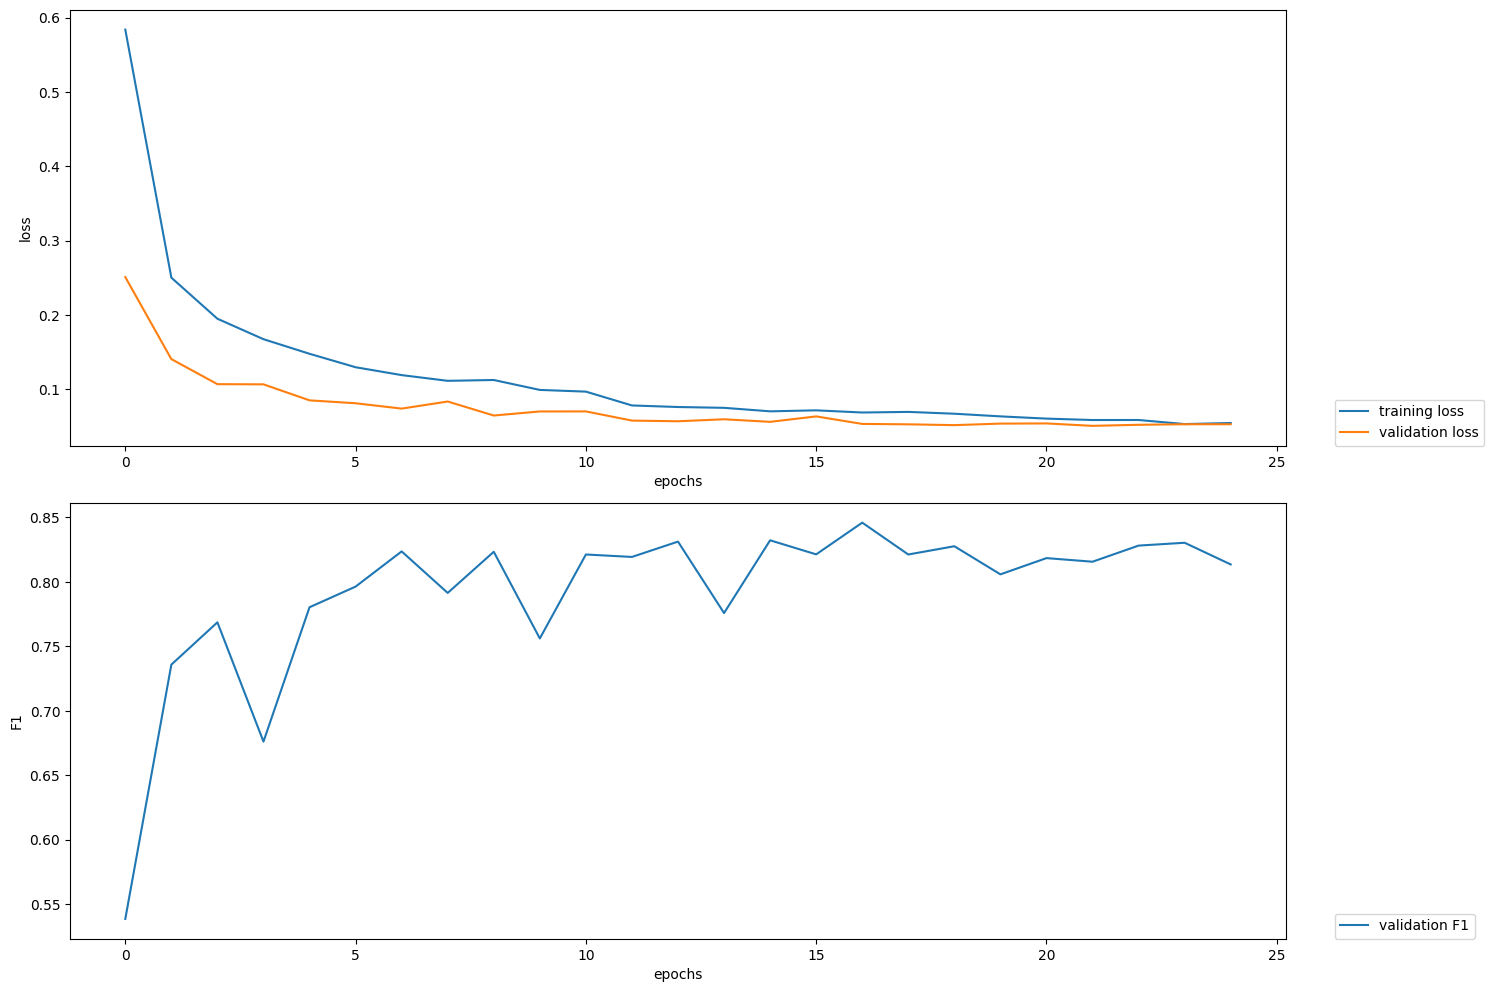

2024-01-22 15:31:52,914 Weights plots are saved in /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/Flair-ES/Flair-ECHR-train-ES/flair-ner-echr-es-projected/weights.png


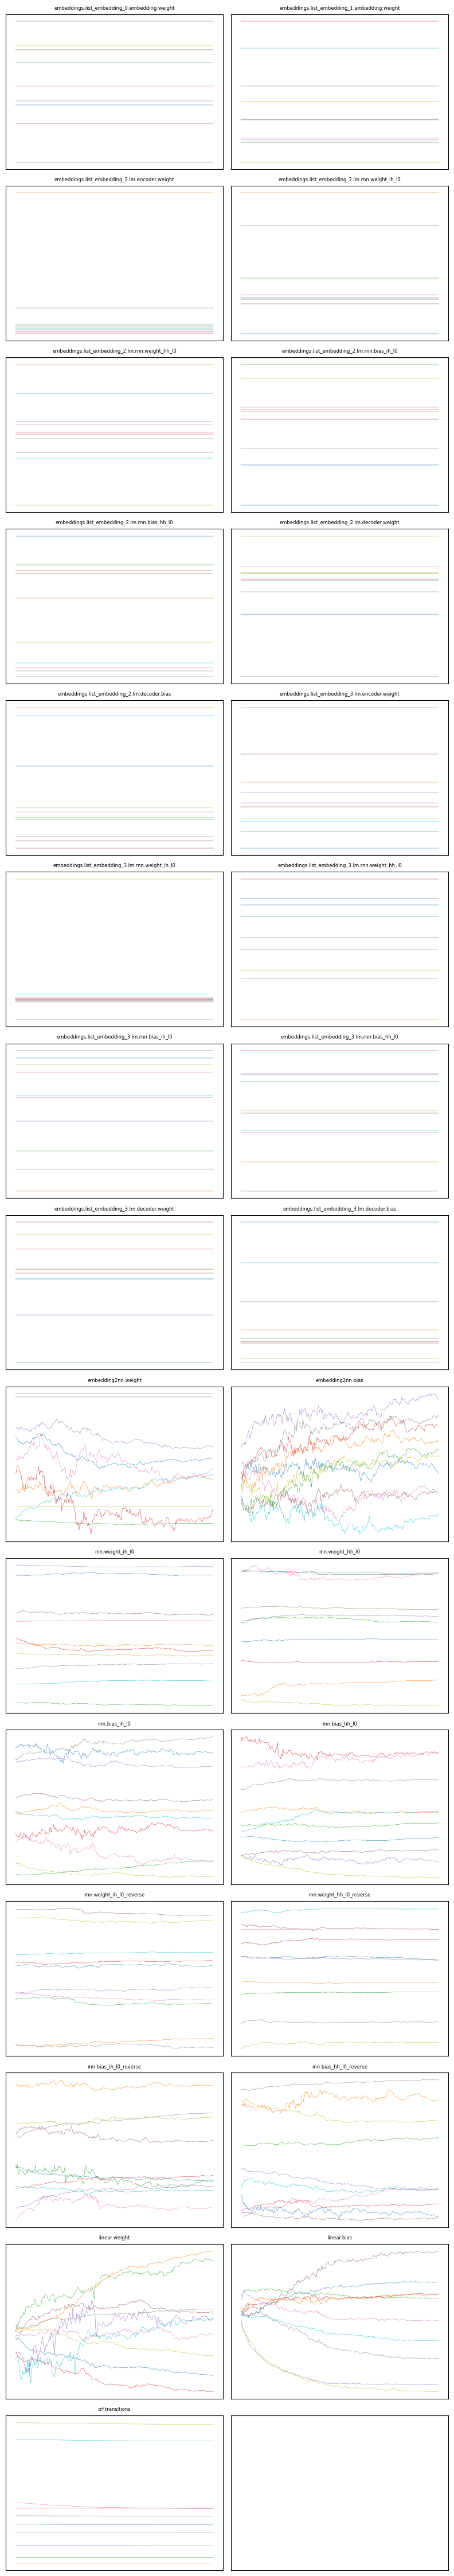

In [12]:
# plot training loss and weights
# Check documentation on training models with Flair

from flair.visual.training_curves import Plotter

plotter = Plotter()
plotter.plot_training_curves('/content/drive/MyDrive/.../loss.tsv')
plotter.plot_weights('/content/drive/MyDrive/.../weights.txt')